# Brent Oil Price Time Series Analysis

This notebook explores the key properties of the Brent oil price time series, including trend and stationarity, and discusses their implications for modeling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

# Load Brent oil price data
df = pd.read_csv('../data/raw/BrentOilPrices.csv')
df.columns = [col.strip() for col in df.columns]
# Try to infer date column
date_col = [col for col in df.columns if 'date' in col.lower()][0]
df[date_col] = pd.to_datetime(df[date_col])
df = df.sort_values(date_col)
df.set_index(date_col, inplace=True)

# Try to infer price column
price_col = [col for col in df.columns if 'price' in col.lower()][0]
df = df[[price_col]].dropna()
df.rename(columns={price_col: 'Price'}, inplace=True)

df.head()

C:\Users\Eyoel\AppData\Local\Temp\ipykernel_15708\1008745343.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col])


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


## Visualize the Time Series
Let's plot the Brent oil price to observe trend and volatility.

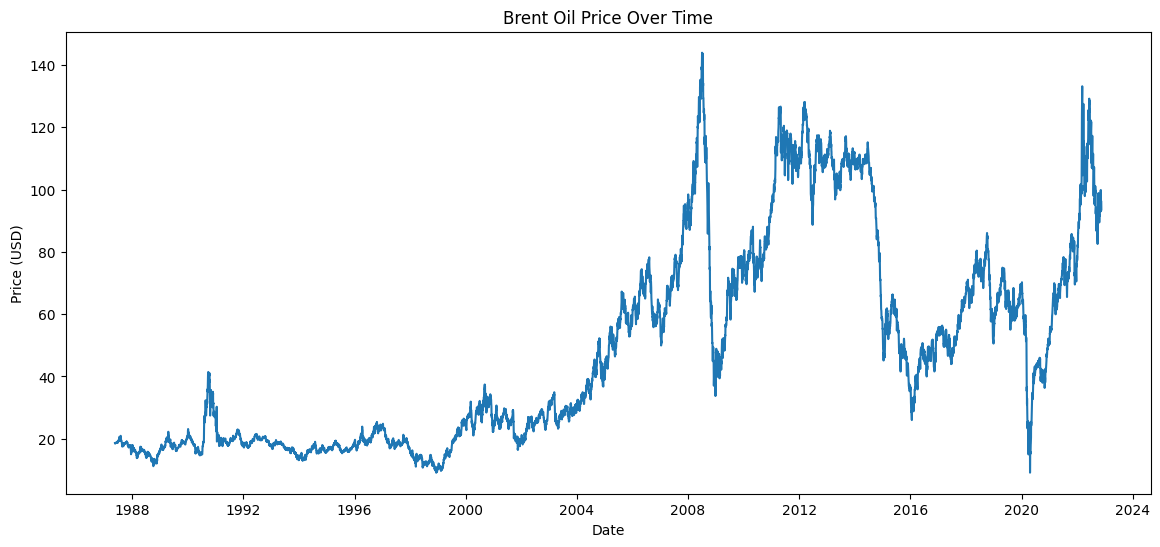

In [2]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x=df.index, y='Price')
plt.title('Brent Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

## Check for Stationarity (ADF Test)
The Augmented Dickey-Fuller (ADF) test helps determine if the series is stationary.
A low p-value (typically < 0.05) suggests stationarity.

In [3]:
result = adfuller(df['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Critical Value (1%): -3.4310783342658615
Critical Value (5%): -2.861861876398633
Critical Value (10%): -2.566941329781918


### Interpretation
- **Trend:** The plot may reveal long-term upward or downward movements.
- **Stationarity:** If the p-value is high, the series is non-stationary, suggesting the need for differencing or detrending before modeling.

These properties inform the choice of models (e.g., ARIMA for stationary data, regime-switching or change point models for structural breaks).

## Purpose of Change Point Models
Change point models help identify structural breaks in the time series—points where statistical properties change.

**Expected Outputs:**
- Dates of detected change points
- New parameter values for each segment

**Limitations:**
- Not all detected change points correspond to real-world events
- May be sensitive to noise and parameter choices
- Detects correlation, not causation

Change point analysis is a powerful tool for understanding regime shifts, but results must be interpreted with caution.